# COMP 432 GROUP PROJECT:  🥑🥑🥑🥑  Avocado Data Analysis  🥑🥑🥑🥑
*  Submitted by G02
    * Jixuan Li  40073785
    * Dejian Wang 27754396

---


## Part 1 -- Introduction 🥑


---
<p>
Avocado is an important fruit we consume everyday.  It contains Vitamin A, Vitamin E, unsaturated fat, which can be an ideal fat source of daily diet. However, when you are trying to pick the best avocado from a huge heap in the supermarket, have you ever thought about how we can do an analysis about the avocado data? Thanks to Kaggle we got a bunch of high quality Avocado selling stats data w.r.t. their date, average price, the vending volume of each brand, also the type(organic or normal), and which state this data came from. We decided to apply those algorithms we learned from this course to these data. 
<p/>
<p>
First of all, we are going to apply classification models to the data, in order to give out a classifier, to see which type of the avocado is, by feeding other features to the model.
</p>
<p>
Then, we are going to apply the regression methods to the data, so as to predict  the avocado price by giving features.
</p>
<p>
By tuning those classification and regression models, we would like to combine what we learned in COMP 432 with the specific project. Also, this project can help us reflect our academic knowledge better. 
</p>


## Part 2 -- Data Preperation 🥑
---

### 2.1  Import Packages


In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
#
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
#
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
#
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
#
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
#
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import os
import warnings
import math
warnings.filterwarnings("ignore")

### 2.2 Import Data
<hr/>

The raw data we got from Kaggle is in csv format(as shown), there are 14 columns (features) in total: 


1.   Titleless index : index starting from 0
2.   Date: the date of the observation
3. AveragePrice: the average price of a single avocado
4. Total Volume: total volume of avocados sold
5. 4046: total number of avocado with PLU number 4046 sold 
6. 4225: total number of avocado with PLU number 4225 sold 
7. 4770: total number of avocado with PLU number 4770 sold 
8. Total Bags: total # of bags sold in the date
9. Small Bags / Large Bags / XLarge Bags: number of bags sold by the size of bag
10. Type: whether the avocado data is conventional or organic
11. Year: the data recorded year
12. Region: the US state of the record



In [71]:
data = pd.read_csv("avocado.csv")
data.head()


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


### 2.3 General Features Analysis
---



In [72]:
row, columns = data.shape

### 2.3.1 Data Properties
---
* We are going to analyze the dataset by these 14 features. Each feature's properties is as the data describe function shows here

In [73]:
display(data.describe().T)

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,18249.0,24.232232,1.548104e+01,0.00,10.00,24.00,38.00,52.00
AveragePrice,18249.0,1.405978,4.026766e-01,0.44,1.10,1.37,1.66,3.25
Total Volume,18249.0,850644.013009,3.453545e+06,84.56,10838.58,107376.76,432962.29,62505646.52
4046,18249.0,293008.424531,1.264989e+06,0.00,854.07,8645.30,111020.20,22743616.17
4225,18249.0,295154.568356,1.204120e+06,0.00,3008.78,29061.02,150206.86,20470572.61
4770,18249.0,22839.735993,1.074641e+05,0.00,0.00,184.99,6243.42,2546439.11
Total Bags,18249.0,239639.202060,9.862424e+05,0.00,5088.64,39743.83,110783.37,19373134.37
Small Bags,18249.0,182194.686696,7.461785e+05,0.00,2849.42,26362.82,83337.67,13384586.80
Large Bags,18249.0,54338.088145,2.439660e+05,0.00,127.47,2647.71,22029.25,5719096.61
XLarge Bags,18249.0,3106.426507,1.769289e+04,0.00,0.00,0.00,132.50,551693.65


### 2.3.2 Missing Values
---

The data behaves well in missing values, it is well prepared for analysing.
<p> As we see from the null result, this data is clean and perfect without any null values, so no intrepolation is needed</p>

In [74]:
data.isnull().sum()


Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

### 2.3.3 Data Visualization
<hr/>

#### **Organic VS Conventional Avocado**
   *  9126 conventional avocado data points
   *  9123 organic avocado data points

#### **Average Price Analysis (All the Data)**

As we can see from the following figure, the average price of organic avocados is higher than conventional avocados. For organics, the average price is more than 1.5 dollar. On comparison, the conventional avocado price is around 1.1 dollar.

Text(0.5, 0, 'Average Price')

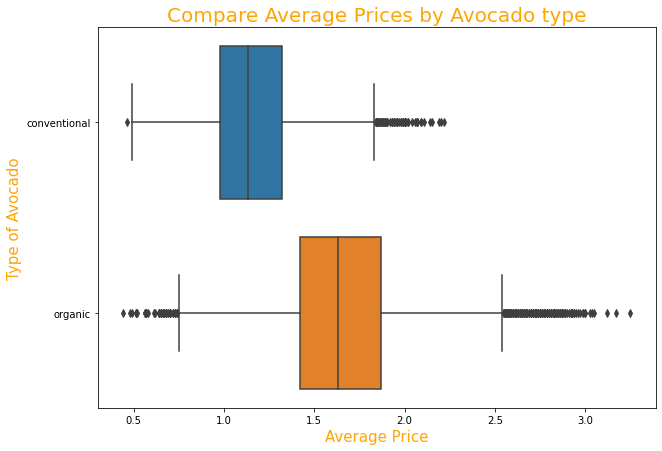

In [75]:
f,ax = plt.subplots(figsize = (10,7))
sns.boxplot(y="type", x="AveragePrice",data=data)
plt.title("Compare Average Prices by Avocado type",fontsize = 20,color='orange')
plt.ylabel('Type of Avocado',fontsize = 15,color='orange')
plt.xlabel('Average Price',fontsize = 15,color='orange')




#### **Average Price Analysis (Year specific)**

Yearly speaking, we can see the average price stays stable over the years, however, the price variance in 2016 and 2017 is greater than 2015 and 2018

Text(0, 0.5, 'Average Price')

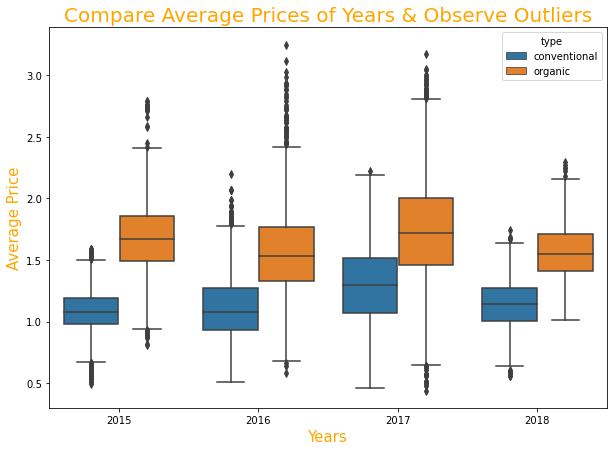

In [76]:
f, ax = plt.subplots(figsize = (10,7))
sns.boxplot(x="year", y="AveragePrice",hue="type",data=data)
plt.title("Compare Average Prices of Years & Observe Outliers",fontsize = 20,color='orange')
plt.xlabel('Years',fontsize = 15,color='orange')
plt.ylabel('Average Price',fontsize = 15,color='orange')

## 2.4 Feature Engineering

In order to elevate the performance of our model, we need to preprocess the data.  So we splitted the date into year, month, and day. Also, we removed the region column, since our analysis is not related to the state difference.   


In [77]:
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


### 2.4.1a Split Date -> Year - Month - Day

In [78]:
# split date: day,month,year
list_temp = []
for date in data.Date:
    list_temp.append(date.split("-"))

# month and day adding to lists
month = []
day = []
for i in range(len(list_temp)):
    month.append(list_temp[i][1])
    day.append(list_temp[i][2])

# adding to dataset
data["month"] = month
data["day"] = day

# delete old date column
data.drop(["Date"],axis=1,inplace=True)

#convert objects to int
data.month = data.month.values.astype(int)
data.day = data.day.values.astype(int)


### 2.4.1b Add Feature Price/Volume

In [79]:

# Some advice features added, from TA's suggestion.
# PriceVolume
price_list=[]
volume_list=[]
price_volume_list=[]

# get list from data
for price in data['AveragePrice']:
    price_list.append(price)
for volume in data['Total Volume']:
    volume_list.append(volume)
    
# log(AvgPrice * TotalVolume)
for i in range(len(price_list)):
    price_volume_list.append(math.log(price_list[i]/volume_list[i]))
# adding to dataset
data['PriceTimesVolume'] = price_volume_list

### 2.4.2 remove redundant features


In [80]:
data1 = data
data1.drop(["Unnamed: 0","region"],axis=1,inplace=True)
data1["type"] = pd.get_dummies(data.type,drop_first=True)

data.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,month,day,PriceTimesVolume
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,12,27,-10.785150
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,12,20,-10.612745
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,12,13,-11.752875
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,12,6,-11.200143
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,11,29,-10.593497


## **Part 3 -- Classification Modeling 🥑**
<hr>

Yeah, that's true! We can predict whether your avocado is Organic or not!

The main topic of our classification modeling is “given the features, try to determine whether the avocado is Organic or Not. According to what we learn in this class, we will first use classic models(the best one from Logistic Regression, K neighbours, SVM, Gaussian Naive Bayes and Decision Tree models) to do the classification, then we will try to fit the data with Ensemble Models (the best performance of Adaboost, Gradient Boost, RandomForest and Extra Tree model )

### **3.1 Data Preperation**
---
Here we need to prepare the data for our classification model training.

Our todo list:

1.   Split type from the raw data, create a pointer y to it. 
2.   Drop the type feature from data, and make it X
3.  Standarlization, scaling the data into interim [-1,1] by `StandardScaler.fit_transform`
4. split the data into train set and test set by `train_test_split`, here we keep 80% data for training, and the left 20% for testing





In [81]:
# Y, aka target, is the type of avocado
data["type"]
y = data[["type"]][:]

# x, all the features.
x = data.drop(["type"], axis=1, inplace=True)
x = data.iloc[:, :]
# # Scale the data to [-1, 1]
standard_scaler = StandardScaler()
x = standard_scaler.fit_transform(x)

# # Split the data into Train and Test sets
# #  20% testing, 80% training
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=3)


y_test.head()


,type
2258,0
11669,1
14336,1
8514,0
8545,0


### **3.2 Classic Classification Modeling**
---

First, let's use the classic models for organic avocado prediction

We are planning to do the cross validation with 10 fold of the data by  following models, then we pick the one with best performance for further tuning.  

1.   Logistic Regression `sklearn.linear_model.LogisticRegression`
2.   K Neighbors `sklearn.neighbors.KNeighborsClassifier`
3. Support Vector Machine Classifier ``
4. Gaussian Naive Bayes Classifier `sklearn.naive_bayes.GaussianNB`
5. Decision Tree Classifier `sklearn.tree.DecisionTreeClassifier`





In [82]:
models = []
models.append(('Logistic Regression', LogisticRegression()))
models.append(('K neighbours',KNeighborsClassifier()))
models.append(('SVM', SVC()))
models.append(('Gaussian NB', GaussianNB()))
models.append(('Decision Tree Classifier', DecisionTreeClassifier()))

In [83]:
# evaluate models using cross validation score:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=42)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print("Model Name:{} Model Acc:{:.3f} Model Std:{:.3f}".format(name, cv_results.mean(), cv_results.std()))

Model Name:Logistic Regression Model Acc:0.946 Model Std:0.006
Model Name:K neighbours Model Acc:0.946 Model Std:0.005
Model Name:SVM Model Acc:0.953 Model Std:0.005
Model Name:Gaussian NB Model Acc:0.871 Model Std:0.007
Model Name:Decision Tree Classifier Model Acc:0.984 Model Std:0.004


We can find from the process, in all the classic models, Decision Tree behaves the best.
And in DT, we use entropy as the criteria can make the DT behave the best, the score --> 0.98

* **Decision Tree Parameter Refining**

As we can see from the 10-fold cross validation, the Decision Tree Model scores the most, so we continue refining the DT classifier:

We use grid search, let sklearn help us to search the best Hyperparameters 

In [84]:
criterion = ["gini","entropy"]
param_grid = dict(criterion=criterion)
dtc = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator=dtc, param_grid=param_grid, scoring="accuracy", cv=10).fit(x_train, y_train)
best_score = grid_search.best_score_
best_parameters = grid_search.best_params_
print("best parameters:", best_parameters)
print("best score:", best_score)


best parameters: {'criterion': 'entropy'}
best score: 0.98465654839588




So we build a DT model with entropy to do the prediction.
* 0.9863 by gini
* 0.9882 by entropy

Basically, gini and entropy behaves the same, here we choose **entropy** as the critera


In [85]:
dt = DecisionTreeClassifier(criterion='entropy').fit(x_train, y_train)
y_prediction = dt.predict(x_test)

from sklearn import metrics
dtc_confusion_matrix = confusion_matrix(y_test, y_prediction)
type(y_test)
dtc_cross = pd.crosstab(y_test["type"], y_prediction, rownames=['actual'], colnames=['prediction'])
dtc_acc = metrics.accuracy_score(y_test, y_prediction)
print(dtc_cross)
print(dtc_acc)

prediction     0     1
actual                
0           1798    21
1             22  1809
0.9882191780821917


* So, we can train a model by entropy, and now we see the result.

In [86]:
from sklearn.metrics import classification_report 
report = classification_report(y_test, y_prediction) 
print(report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1819
           1       0.99      0.99      0.99      1831

    accuracy                           0.99      3650
   macro avg       0.99      0.99      0.99      3650
weighted avg       0.99      0.99      0.99      3650



## **3.3 Ensemble Models**
---
After we tried the classic models, now we can apply ensemble models (AdaBoost, GradientBoosting, RandomForest, ExtraTrees) to the data.

In [87]:
ensembles = []
ensembles.append(('Adaboost', AdaBoostClassifier()))
ensembles.append(('GradientBoost', GradientBoostingClassifier()))
ensembles.append(('RandomForest', RandomForestClassifier()))
ensembles.append(('ExtraTrees', ExtraTreesClassifier()))

In [88]:
# bombard models to the data by using cross validation score:
results_ensemble = []
names_ensemble = []
for name, model in ensembles:
    kfold = KFold(n_splits=10, random_state=42)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
    results_ensemble.append(cv_results)
    names_ensemble.append(name)
    print("Model Name:{} Model Acc:{:.3f} Model Std:{:.3f}".format(name, cv_results.mean(), cv_results.std()))


Model Name:Adaboost Model Acc:0.981 Model Std:0.003
Model Name:GradientBoost Model Acc:0.989 Model Std:0.003
Model Name:RandomForest Model Acc:0.994 Model Std:0.002
Model Name:ExtraTrees Model Acc:0.995 Model Std:0.002


<strong> As we can see from the cross validation score, extra tree classifier behaves the best.--- 0.997 </strong>
So we now tuning the ETC

* **Extra Decision Tree Classifier Refining**

We can use Grid Search, to get the best Hyperparameter group of the Extra Tree classifier

In [89]:
# Tuning Extra Trees Classification Model
estimators = [75,90,100,115,130] 
criterions = ["gini","entropy"]
param_grid = dict(n_estimators=estimators,criterion=criterions) 

In [90]:
etc = ExtraTreesClassifier()
gs = GridSearchCV(estimator=etc,param_grid=param_grid,scoring="accuracy", cv=10)
grid_search = gs.fit(x_train,y_train)
best_score = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Score:",best_score)
print("Best Parameters:",best_parameters)

Best Score: 0.9958901292872768
Best Parameters: {'criterion': 'gini', 'n_estimators': 75}


* As we can see from the result, we can build an <strong>Extra Tree Classifier</strong> with <strong>entropy</strong> criteria, and <strong>n_estomators = 115</strong>.

In [91]:
# Time to use ETC for dataset:
etc = ExtraTreesClassifier(n_estimators=115,criterion="entropy")
etc.fit(x_train,y_train)
y_prediction = etc.predict(x_test)

In [92]:
#confussion matrix: 
from sklearn import metrics
etc_cm = confusion_matrix(y_test,y_prediction)
etc_cross = pd.crosstab(y_test["type"], y_prediction,rownames=['Actual Values'], colnames=['Predicted Values'])
etc_acc = metrics.accuracy_score(y_test, y_prediction)
print(etc_cross)
print(etc_acc)

Predicted Values     0     1
Actual Values               
0                 1813     6
1                    9  1822
0.9958904109589041


As we can see from the result of ensemble models, the accuracy score is 0.997, in comparison with the classic modles accuracy score: 0.988, it works better.

In [93]:
# Classiﬁcation Report
from sklearn.metrics import classification_report 
report = classification_report(y_test, y_prediction,digits=3) 
print(report)

              precision    recall  f1-score   support

           0      0.995     0.997     0.996      1819
           1      0.997     0.995     0.996      1831

    accuracy                          0.996      3650
   macro avg      0.996     0.996     0.996      3650
weighted avg      0.996     0.996     0.996      3650



### 3.4 Neural Network 

Also, we can train a Neural Network to do the classification

In [94]:
from sklearn.neural_network import MLPClassifier
mlpc = MLPClassifier(verbose=False)
mlpc.fit(x_train, y_train)    
mlpc.max_iter 
mlpc.hidden_layer_sizes
y_pred = mlpc.predict(x_test)


mlpc.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [95]:
#confussion matrix: 
from sklearn import metrics
mlpc_cm = confusion_matrix(y_test,y_pred)
mlpc_cross = pd.crosstab(y_test["type"], y_pred,rownames=['Actual Values'], colnames=['Predicted Values'])
mlpc_acc = metrics.accuracy_score(y_test, y_pred)
print(mlpc_cross)
print(mlpc_acc)

Predicted Values     0     1
Actual Values               
0                 1789    30
1                   26  1805
0.9846575342465753


### 3.5 Model Comparison

* Decision Tree Classifier:  

In [96]:
dtc_acc

0.9882191780821917

* Extra Tree Classifier

In [97]:
etc_acc

0.9958904109589041

* Neural Network Classifier:

In [28]:
mlpc_acc

0.9841095890410959

 * <strong>Concluision: Extra Tree Classifier is the best model for classification in this situation</strong>

## Part 4 -- Regression Modeling

### 4.1 Data Pre-process


<hr/>

#### 4.1.1 Import Data
<hr/>

In [36]:
data = pd.read_csv("avocado.csv")
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


#### 4.1.2 Data Engineering

In [37]:

# Some advice features added, from TA's suggestion.
# PriceVolume
price_list=[]
volume_list=[]
price_volume_list=[]

# get list from data
for price in data['AveragePrice']:
    price_list.append(price)
for volume in data['Total Volume']:
    volume_list.append(volume)
    
# log(AvgPrice * TotalVolume)
for i in range(len(price_list)):
    price_volume_list.append(math.log(price_list[i]/volume_list[i]))
# adding to dataset
data['PriceTimesVolume'] = price_volume_list

# Split Dataset, "conventional & organic"
data_con = data[data["type"] == "conventional"]
data_org = data[data["type"] == "organic"]

# split date: day,month,year
date_list = []
for date in data.Date:
    date_list.append(date.split("-"))

# month and day adding to lists
month = []
day = []
for i in range(len(date_list)):
    month.append(date_list[i][1])
    day.append(date_list[i][2])

# adding to dataset
data["month"] = month
data["day"] = day

# delete old date column
data.drop(["Date"],axis=1,inplace=True)

# convert objects to int
data.month = data.month.values.astype(int)
data.day = data.day.values.astype(int)


# drop unnecessary features
data.drop(["Unnamed: 0"],axis=1,inplace=True)

# find dummy variables
data_con = pd.get_dummies(data_con,drop_first=True)
data_org = pd.get_dummies(data_org,drop_first=True)


data.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,PriceTimesVolume,month,day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,-10.785150,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,-10.612745,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,-11.752875,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,-11.200143,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,-10.593497,11,29


#### 4.1.3 Ordinary Least Squares (OLS) Estimation
<hr/>

For Conventional Avocado

In [38]:
# For Conventional
import statsmodels.api as sm
exog_con = data_con.iloc[:,1:].values
endog_con = data_con.iloc[:,[0]].values
r_ols_con = sm.OLS(endog_con,exog_con) 
r_con = r_ols_con.fit()
print('Parameters: ',r_con.params)
print('Conventional OLS Result_R2: ', r_con.rsquared)

Parameters:  [ 5.40600786e-10 -1.90933103e-11  1.91022198e-11  1.90837623e-11
  1.90885086e-11  9.07444675e-11 -7.16635085e-11 -7.16525728e-11
 -7.16519621e-11  2.53101737e-02 -2.87240121e-10 -1.00000000e+00
 -2.00000000e+00 -3.00000000e+00 -4.00000000e+00 -5.00000000e+00
 -6.00000000e+00 -7.00000000e+00 -8.00000000e+00 -9.00000000e+00
 -1.00000000e+01 -1.10000000e+01 -1.20000000e+01 -1.30000000e+01
 -1.40000000e+01 -1.50000000e+01 -1.60000000e+01 -1.70000000e+01
 -1.80000000e+01 -1.90000000e+01 -2.00000000e+01 -2.10000000e+01
 -2.20000000e+01 -2.30000000e+01 -2.40000000e+01 -2.50000000e+01
 -2.60000000e+01 -2.70000000e+01 -2.80000000e+01 -2.90000000e+01
 -3.00000000e+01 -3.10000000e+01 -3.20000000e+01 -3.30000000e+01
 -3.40000000e+01 -3.50000000e+01 -3.60000000e+01 -3.70000000e+01
 -3.80000000e+01 -3.90000000e+01 -4.00000000e+01 -4.10000000e+01
 -4.20000000e+01 -4.30000000e+01 -4.40000000e+01 -4.50000000e+01
 -4.60000000e+01 -4.70000000e+01 -4.80000000e+01 -4.90000000e+01
 -5.00000000

For Organic Avocado

In [39]:
# For Organic
import statsmodels.api as sm
exog_org = data_org.iloc[:,1:].values
endog_org = data_org.iloc[:,[0]].values
r_ols_org = sm.OLS(endog_org,exog_org) 
r_org = r_ols_org.fit()
print('Parameters: ',r_org.params)
print('Organic OLS Result_R2: ', r_org.rsquared)


Parameters:  [ 1.96591436e-02 -9.53636380e-07  1.17856297e-06  8.67735516e-07
  7.35715521e-06  2.66484669e-02 -2.66475046e-02 -2.66473534e-02
 -2.66685687e-02  2.52920302e-02  7.93107249e-04 -1.00063441e+00
 -2.00074234e+00 -3.00157753e+00 -3.99967317e+00 -4.99974888e+00
 -6.00080690e+00 -7.00096315e+00 -8.00101369e+00 -9.00019775e+00
 -1.00010057e+01 -1.10006424e+01 -1.20013686e+01 -1.30018294e+01
 -1.39999379e+01 -1.50008605e+01 -1.60013733e+01 -1.70008869e+01
 -1.79995417e+01 -1.90050647e+01 -2.00018884e+01 -2.10008400e+01
 -2.20018564e+01 -2.30027390e+01 -2.40027672e+01 -2.50015200e+01
 -2.60024949e+01 -2.70025631e+01 -2.80004971e+01 -2.90020295e+01
 -3.00035770e+01 -3.10040675e+01 -3.20033264e+01 -3.30029591e+01
 -3.40014905e+01 -3.50032811e+01 -3.60040874e+01 -3.70036470e+01
 -3.80034623e+01 -3.90019559e+01 -4.00010080e+01 -4.10019145e+01
 -4.20009399e+01 -4.29999344e+01 -4.40001745e+01 -4.49998950e+01
 -4.59996413e+01 -4.69997798e+01 -4.79913696e+01 -4.89830765e+01
 -4.99824694

Observations:
* The small P values indicate that we can reject the null hypothesis that Quantity has no effect on Price.
* Hight R-squared indicates that our model explains a lot of the response variability.
* In regression analysis, we’d like our regression model to have significant variables and to produce a high R-squared value.
* We will show graphs to help interpret regression analysis results more intuitively.

### 4.2 Regression Predict
#### 4.2.1 Prepare Dataset for Regression
<hr/>

In [40]:
# Y
y = data_con[["AveragePrice"]][:]
# X
x = data_con.drop(["AveragePrice"],axis=1,inplace=True)
x = data_con.iloc[:,1:]
# Scale the data to be between -1 and 1
sc_x = StandardScaler()
sc_y = StandardScaler()
x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y)
# Creating Train and Test Datasets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=3)

#### 4.2.2 Classical Models
<hr/>

* use following models
    * LinearRegression
    * Lasso
    * ElasticNet
    * KNeighborsRegressor
    * DecisionTreeRegressor
    * SVR

In [41]:
classic_models = []
classic_models.append(('LR', LinearRegression()))
classic_models.append(('LASSO', Lasso()))
classic_models.append(('EN', ElasticNet()))
classic_models.append(('KNN', KNeighborsRegressor()))
classic_models.append(('DTR', DecisionTreeRegressor()))
classic_models.append(('SVR', SVR()))

In [42]:
# evaluate models using cross validation score:
classic_results = []
classic_names = []
for name, model in classic_models:
    kfold = KFold(n_splits=10, random_state=42)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='r2')
    classic_results.append(cv_results)
    classic_names.append(name)
    print("Model Name:{} Model Score:{:.3f} Model Std:{:.3f}".format(name, cv_results.mean(), cv_results.std()))

Model Name:LR Model Score:0.944 Model Std:0.002
Model Name:LASSO Model Score:-0.003 Model Std:0.004
Model Name:EN Model Score:-0.003 Model Std:0.004
Model Name:KNN Model Score:0.444 Model Std:0.032
Model Name:DTR Model Score:0.858 Model Std:0.022
Model Name:SVR Model Score:0.835 Model Std:0.003


Text(0.5, 0, 'Scores')

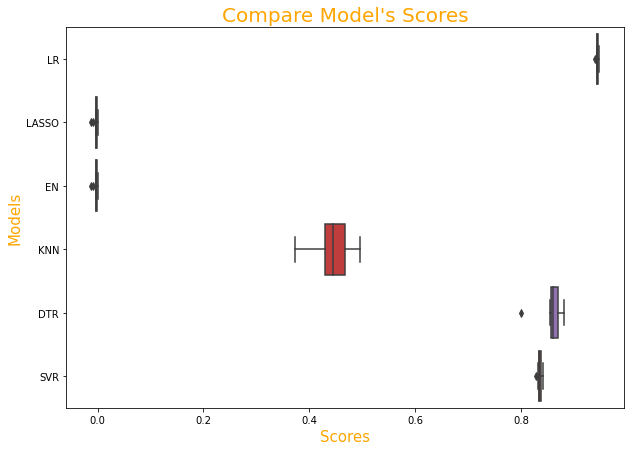

In [43]:
# Compare Model's Scores
f,ax = plt.subplots(figsize = (10,7))
sns.boxplot(y=classic_names,x=classic_results);
plt.title("Compare Model's Scores",fontsize = 20,color='orange')
plt.ylabel('Models',fontsize = 15,color='orange')
plt.xlabel('Scores',fontsize = 15,color='orange')

Both linear regressor and support vector regressor did a great job here. However, I want to use decision tree regressor to compare ensemble model in the future, but model socre of DTR (0.651) is not good, which need hyper parameter tunning .

#### 4.2.3 Tuning Decision Tree Model
<hr/>

In [44]:
# Tuning Decision Tree Model
criterions = ["mse","mae"]
param_grid = dict(criterion=criterions)
dtr = DecisionTreeRegressor()
gs = GridSearchCV(estimator=dtr,param_grid=param_grid,scoring="r2", cv=kfold)
grid_search = gs.fit(x_train,y_train)
best_score = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Score:",best_score)
print("Best Parameters:",best_parameters)

Best Score: 0.8591487657248024
Best Parameters: {'criterion': 'mse'}


In [45]:
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

0.859149 (0.021744) with: {'criterion': 'mse'}
0.847481 (0.012931) with: {'criterion': 'mae'}


By comparing scoring between Mean Absolute Error(MAE) and Mean Square Error(MSE), we find that using MSE is better choice

In [46]:
# Time to use DTR for dataset:
dtr = DecisionTreeRegressor(criterion="mse")
dtr.fit(x_train,y_train)
y_pred = dtr.predict(x_test)
result_DTR = r2_score(y_test, y_pred)
print("{:.2f}".format(result_DTR))

0.86


In [47]:
results_models = []
results_models.append(result_DTR)

#### 4.2.4 Ensemble Models
<hr/>

In [48]:
# ensembles
ensembles = []
ensembles.append(('ABR', AdaBoostRegressor()))
ensembles.append(('GBR', GradientBoostingRegressor()))
ensembles.append(('RFR', RandomForestRegressor()))
ensembles.append(('ETR', ExtraTreesRegressor()))

In [49]:
# evaluate models using cross validatiob score:
results_ensemble = []
names_ensemble = []
for name, model in ensembles:
    kfold = KFold(n_splits=10, random_state=42)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='r2')
    results_ensemble.append(cv_results)
    names_ensemble.append(name)
    print("Model Name:{} Model Score:{:.3f} Model Std:{:.3f}".format(name, cv_results.mean(), cv_results.std()))

Model Name:ABR Model Score:0.534 Model Std:0.033
Model Name:GBR Model Score:0.769 Model Std:0.019
Model Name:RFR Model Score:0.952 Model Std:0.004
Model Name:ETR Model Score:0.955 Model Std:0.003


Text(0.5, 0, 'Scores')

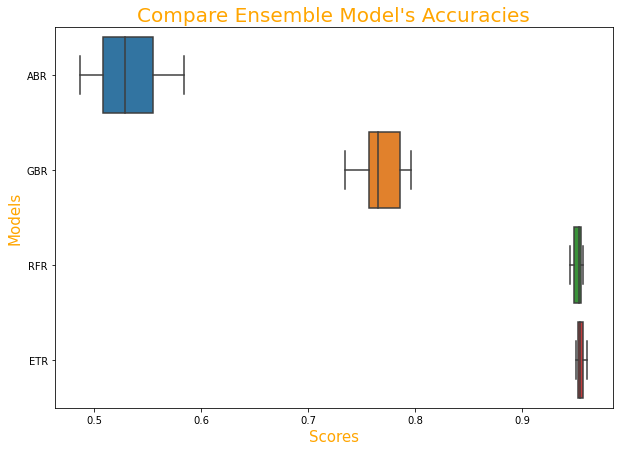

In [50]:
# Compare Model's Acc
f,ax = plt.subplots(figsize = (10,7))
sns.boxplot(y=names_ensemble, x=results_ensemble);
plt.title("Compare Ensemble Model's Accuracies",fontsize = 20,color='orange')
plt.ylabel('Models',fontsize = 15,color='orange')
plt.xlabel('Scores',fontsize = 15,color='orange')

In [51]:
# Tuning Extra Trees Regressior Model
estimators = list(range(25,301,25))
criterions = ["mse","mae"]
param_grid = dict(n_estimators=estimators,criterion=criterions)

In [52]:
# Time to use ETR for dataset:
etr = ExtraTreesRegressor(n_estimators=100,criterion="mse")
etr.fit(x_train,y_train)
y_pred = etr.predict(x_test)
result_ETR = r2_score(y_test, y_pred)
print("{:.2f}".format(result_ETR))

0.96


In [53]:
results_models.append(result_ETR)

#### 4.2.5 XGBOOST Model
<hr/>

In [54]:
from xgboost import XGBRegressor
xgbr = XGBRegressor(silent=True)  # silent: close to warnings
xgbr.fit(x_train,y_train)
y_pred = xgbr.predict(x_test)
result_XGB = r2_score(y_test, y_pred)
print("{:.2f}".format(result_XGB))
results_models.append(result_XGB)

[15:14:18] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


0.96


#### 4.2.6 Neural Network
<hr/>

In [55]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor()
mlp.fit(x_train,y_train)
#mlp.max_iter
#mlp.hidden_layer_sizes#node sayısı
y_pred = mlp.predict(x_test)
result_MLP = r2_score(y_test, y_pred)
print("{:.2f}".format(result_MLP))
results_models.append(result_MLP)

0.85


#### 4.2.7 Compare Models
<hr/>

Text(0.5, 0, 'Scores')

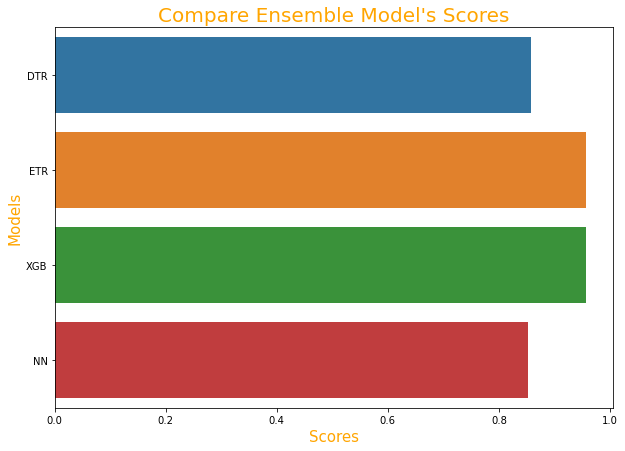

In [56]:
models = ["DTR","ETR","XGB","NN"]
# models = ["DTR","ETR","NN"]
# Compare Model's Acc
f,ax = plt.subplots(figsize = (10,7))
sns.barplot(y=models, x=results_models);
plt.title("Compare Ensemble Model's Scores",fontsize = 20,color='orange')
plt.ylabel('Models',fontsize = 15,color='orange')
plt.xlabel('Scores',fontsize = 15,color='orange')

#### 4.2.8 Use ExtraTreesRegressor to Predict Price
<hr/>

In [57]:
# Note that input data must be normalized
# xtest is test set n_features, use this to test the price
y_predict_sample = etr.predict(x_test[0:5])
y_predict_sample_orig = sc_y.inverse_transform(y_predict_sample)
print('Expected Purchase Price: ', y_predict_sample_orig)
y_real_price= sc_y.inverse_transform(y_test)
print('Real Purchase Price: ',y_real_price[0:5])

Expected Purchase Price:  [1.2398 0.9624 1.2402 1.0389 1.164 ]
Real Purchase Price:  [[1.21]
 [1.03]
 [1.22]
 [1.  ]
 [1.17]]
